# The First Phase

# What variables does the dataset contain?

They variables are 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'.

# Type of variable does the dataset contain


Show_id = Ordinal

Type = Nominal

Title = Nominal

Director = Nominal

Cast = Nominal

Country = Nominal

Date_added = Ordinal Continuous

Release_year = Qualitative/Numerical, ordinal Continuous

Rating = Ordinal

Duration =  Quantitative continuous 

Listed_in = Nominal

Description = Nominal

# How are they distributed?


There are only two categories of videos that are inclueded in this data. All variables are basic informations of movies and TV Shows that Amazon Prime has.

# Initial Questions 

Q1 What year of the movie is favored by amazon?

Q2 Does Amazon Prime prefer Movie or TV Show?

Q3 What countries does amazon prefer?


# The Second Phase

In [230]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.precision", 2)

mlp.__version__

import csv

year = [] 
country = []
yearnum = {}
my = {}
sy = {}
data = {}
cd = {}
with open('amazon_prime_titles.csv','r') as csvfile:
     
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[7] != "release_year":
            if int(row[7]) not in year:
                year.append(int(row[7]))
    
            if row[1] == "Movie":
                if int(row[7]) not in my.keys():
                    my[int(row[7])] = 1
                else:
                    my[int(row[7])] += 1
            else:
                if int(row[7]) not in sy.keys():
                    sy[int(row[7])] = 1
                else:
                    sy[int(row[7])] += 1
        r5 = row[5].split(", ")

        for i in r5:
            if i != "country":
                if i not in country:
                    country.append(i)
                if i != "":
                    if i not in cd.keys():
                        cd[i] = 1
                    else:
                        cd[i] += 1
                elif "Other Country" not in cd.keys():
                    cd["Other Country"] = 1
                else:
                    cd["Other Country"] += 1
    for y in year:
        if y not in my.keys():
            my[y] = 0;
        if y not in sy.keys():
            sy[y] = 0;
    year = list(sorted(year))
    nmy = dict(sorted(my.items()))
    ml = list(nmy.values())
    nsy = dict(sorted(sy.items()))
    syl = list(nsy.keys())
    sl = list(nsy.values())
    ncd = dict(sorted(cd.items(), key=lambda item: item[1]))
    tf =  {'France': 20, 'Canada': 35, 'United Kingdom': 67, 'India': 246, 'United States': 334}
    country = list(tf.keys())
    Count = list(tf.values())

yr = ["1920-1940", "1941-1960", "1961-1980", "1981-2000", "2001-2021"]
yr2 = ["1920 - 1980", "1981-2000", "2001-2021"]
pml = [sum(ml[0:19]),sum(ml[19:39]), sum(ml[39:59]), sum(ml[59:79]), sum(ml[80:])]
psl = [sum(sl[0:59]), sum(sl[59:79]), sum(sl[80:])]
psl2 = [sum(sl[0:19]),sum(sl[19:39]), sum(sl[39:59]), sum(sl[59:79]), sum(sl[80:])]

two = ["Movies", "TV Shows"]
vid = [sum(ml), sum(sl)]
data["Year"] = yr
data["Movies"] = pml
data["TV Shows"] = psl2

   
df = pd.DataFrame(data=data)

df.head()


,Year,Movies,TV Shows
0,1920-1940,173,2
1,1941-1960,315,9
2,1961-1980,326,20
3,1981-2000,850,82
4,2001-2021,6077,1732


# The Second Phase

# Q1 What year of the movie is favored by amazon?


# Follow up 1 What Years of the Movies does Amazon Prefer?

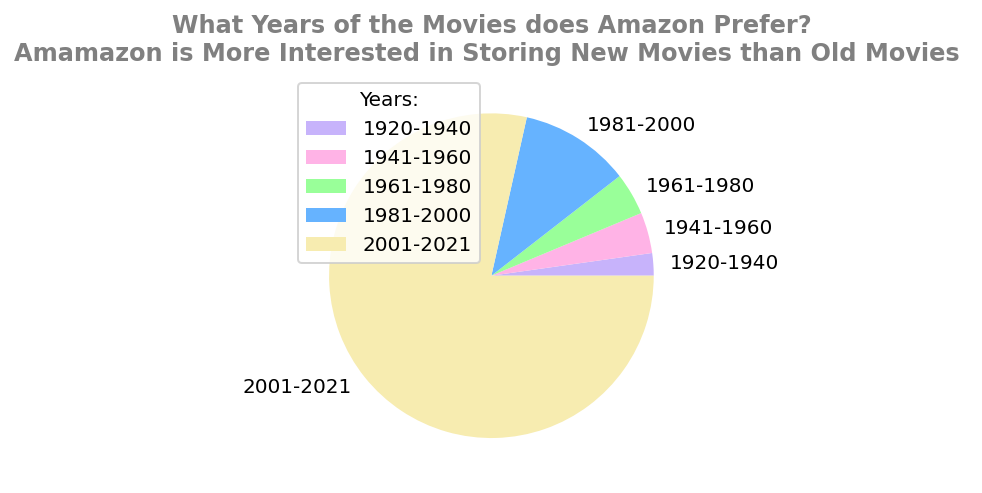

In [231]:

ym = np.array(pml)
ys = np.array(psl)
colors = ['#c7b3fb', '#ffb3e6', '#99ff99', '#66b3ff', '#f7ecb0']
colors2 = ['#99ff99', '#66b3ff', '#f7ecb0']
fig = plt.figure(figsize=(8,4),dpi=144)
ax = fig.add_subplot(121)
ax.pie(ym, labels = yr,  colors=colors)
ax.set_title('What Years of the Movies does Amazon Prefer?\nAmamazon is More Interested in Storing New Movies than Old Movies ', fontsize=12, color = "grey", loc='Center', fontweight='bold' )

plt.legend(title = "Years:")
plt.show() 




Answer: Amazon Prime tends to invest in newer Movies than older movies

In [232]:
# Follow up 2 What Years of the TV Shows does Amazon Prefer?

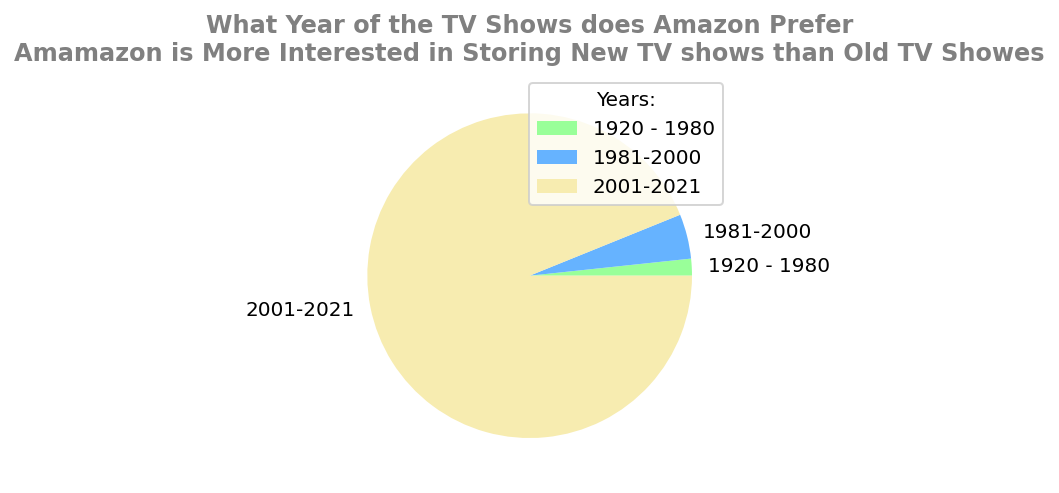

In [233]:
fig = plt.figure(figsize=(8,4),dpi=144)
ax = fig.add_subplot(121)
ax.pie(ys, labels = yr2,  colors=colors2)
ax.set_title('What Year of the TV Shows does Amazon Prefer\nAmamazon is More Interested in Storing New TV shows than Old TV Showes', fontsize=12, color = "grey", loc='Center', fontweight='bold' )

plt.legend(title = "Years:")
plt.show() 



Answer: Amazon Prime tends to invest in newer TV shows than older TV shows

During 1920-1940, there there was almost no TY Shows on Amazon Priem. Therefore I had to combine 1920-1940 with 1941-1960, and 1961-1981 together to generate a visualizable pie chart. However, the inventory of TV Shows rapidly grow after 1980. It is interesting ti get an insight that TV shows was not developed back in 1930 -1980 compared with Movies.

# Q2 Does Amazon Prime prefer Movie or TV Show?


# Does Amazon Prime has more focus on TV Shows than movies in recent years?

[0. 1. 2. 3. 4.]
[0.4 1.4 2.4 3.4 4.4]


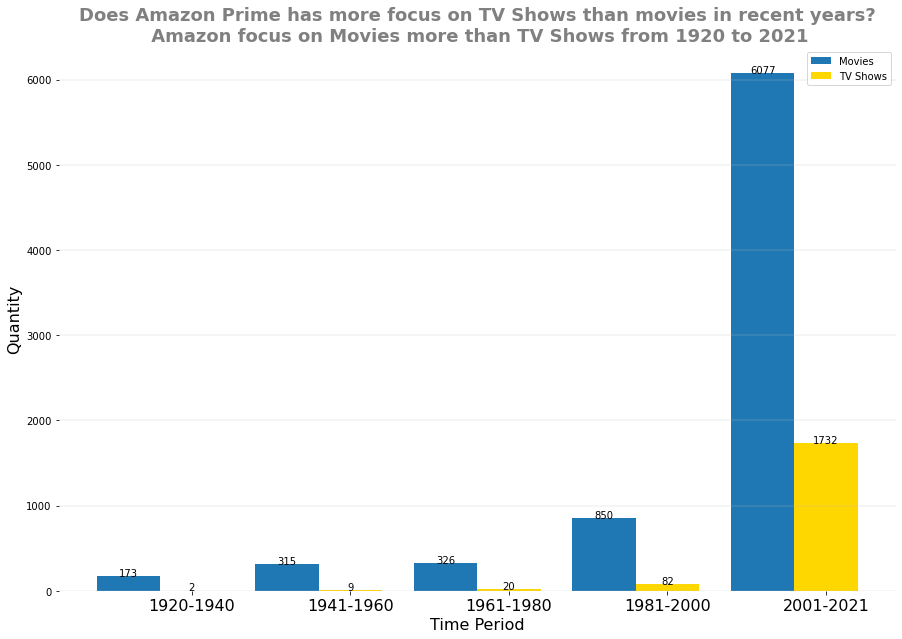

In [241]:
qual_colors=['#1f78b4','gold']

fig, ax = plt.subplots(figsize=(15,10)) 
bar_width = 0.4
x_pos = np.arange(len(df)) #bar location per category
#df.columns[]


for i, col in enumerate(df.columns[1:]):
    print(x_pos + i*bar_width)
    ax.bar( x_pos + i*bar_width, df[col], width=bar_width,  label=col, color=qual_colors[i])
    #ax.text(x_pos + i*bar_width, df[col]+4 , df[col],  ha='center')
   
for i in range(len(df)):

    ax.text(i + bar_width -0.4, data["Movies"][i]+0.3, round(data["Movies"][i],2), ha='center' )
for i in range(len(df)):

    ax.text(i + bar_width, data["TV Shows"][i]+0.3, round(data["TV Shows"][i],2), ha='center' )    

ax.set_ylabel('Quantity', fontsize=16)
ax.set_xlabel('Time Period', fontsize=16)

ax.set_xticks(x_pos + bar_width)
ax.set_xticklabels(df['Year'], fontsize=16)
# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#adding the grid lines for x-axis
ax.grid(visible=True, which='major', axis='y', color='#BFBEBE', lw=0.3) 
ax.set_title('Does Amazon Prime has more focus on TV Shows than movies in recent years?\n Amazon focus on Movies more than TV Shows from 1920 to 2021', fontsize=18, color = "grey", loc='Center', fontweight='bold' )

ax.legend()

Answer: Amazon focus on Movies more than TV Shows from 1920 to 2021. 

# What is the overall difference in Amazon Prime's stockpile of movies and TV shows?

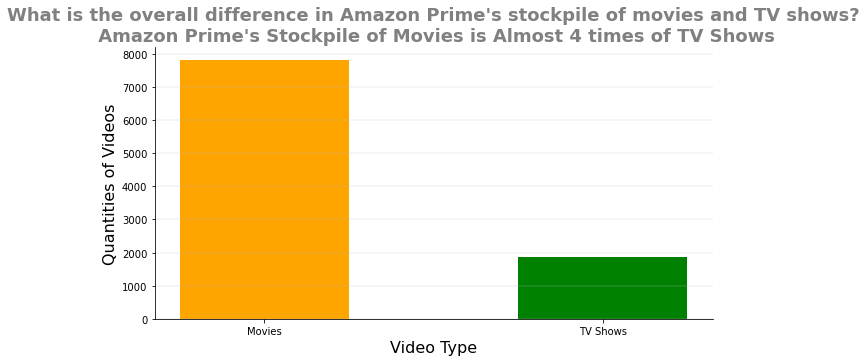

In [242]:
fig, ax = plt.subplots(figsize=(10, 5)) # A figure (size width = 15, height=5) with a single Axes.
ax.bar(two, vid, width = 0.5, color = ["orange", "green"]) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_xlabel("Video Type",  fontsize=16) # labeling the y-axis.
ax.set_ylabel("Quantities of Videos",  fontsize=16)
ax.spines['right'].set_visible(False)# Hide the right spines
ax.spines['top'].set_visible(False) # Hide the top spine
ax.grid(visible=True, which='major', axis='y', color='#BFBEBE', lw=0.3) 
ax.set_title('What is the overall difference in Amazon Prime\'s stockpile of movies and TV shows?\n Amazon Prime\'s Stockpile of Movies is Almost 4 times of TV Shows', fontsize=18, color = "grey", loc='Center', fontweight='bold' )

plt.show() # Show graphic


Answer: Amazon Prime\'s Stockpile of Movies is Almost 4 times of TV Shows

Movies have always been the top choice of Amazon Prime. It is surprising to see during 2001-2021 the quanity of movies in Amazon Prime is almost 6 times larger than it was 20 years agao. 

# Q3 What countries does amazon prefer?

# What Are the Top Five Countries does amazon prefer?

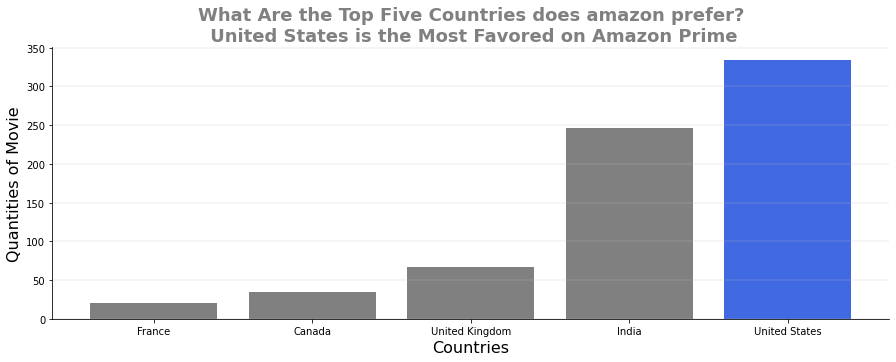

In [240]:
fig, ax = plt.subplots(figsize=(15, 5)) # A figure (size width = 15, height=5) with a single Axes.
ax.bar(country, Count, color = ["grey","grey", "grey", "grey", "royalblue"]) # Creating a simple bar chart, in case of weeken gross I divided all values by 1M. 
ax.set_xlabel("Countries",  fontsize=16) # labeling the y-axis.
ax.set_ylabel("Quantities of Movie",  fontsize=16)
ax.spines['right'].set_visible(False)# Hide the right spines
ax.spines['top'].set_visible(False) # Hide the top spine
ax.grid(visible=True, which='major', axis='y', color='#BFBEBE', lw=0.3) 
ax.set_title('What Are the Top Five Countries does amazon prefer?\n United States is the Most Favored on Amazon Prime', fontsize=18, color = "grey", loc='Center', fontweight='bold' )

plt.show() # Show graphic


Answer: United States is the Most Favored on Amazon Prime

One thing was surprising whenI try to get this data is that some of the movies's country was left empty in the data. I put them into other countries categories and did not consider them in this problem. It is not surprising to see that Amazon have United States' movies the mpst out of all other countrie, because Amazon Prime is an American company